In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import collections
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
weather_df = pd.read_csv('/home/jimit/MastersProject/weather_sanFrancisco.csv')
weather_df.head(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"San Francisco, CA, United States",03/16/2017,64.8,55.2,59.2,NaN,NaN,0.00,0,0,18.9,258.29,29.8,8.9,62.6,79.83,Partially cloudy
1,"San Francisco, CA, United States",03/17/2017,71.5,49.5,59.0,48.5,NaN,0.00,0,0,13.2,237.50,NaN,9.9,25.4,65.41,Partially cloudy
2,"San Francisco, CA, United States",03/18/2017,68.0,55.0,59.5,NaN,NaN,0.00,0,0,13.2,241.58,NaN,9.9,41.8,58.85,Partially cloudy
3,"San Francisco, CA, United States",03/19/2017,63.0,55.0,58.1,NaN,NaN,0.00,0,0,13.5,208.88,NaN,9.4,61.1,81.31,Partially cloudy
4,"San Francisco, CA, United States",03/20/2017,62.8,55.7,58.9,NaN,NaN,0.26,0,0,16.4,169.92,26.4,9.3,67.6,74.83,"Rain, Partially cloudy"


In [3]:
weather_df.shape

(1462, 17)

In [4]:
weather_df.drop(['Heat Index', 'Conditions','Wind Gust', 'Date time', 'Name'], 'columns', inplace = True)

In [5]:
weather_df[weather_df.isnull().any(axis=1)].count()

Maximum Temperature    1039
Minimum Temperature    1039
Temperature            1039
Wind Chill                0
Precipitation          1039
Snow                   1039
Snow Depth             1039
Wind Speed             1039
Wind Direction         1039
Visibility             1039
Cloud Cover            1039
Relative Humidity      1039
dtype: int64

In [6]:
weather_df = weather_df.dropna()

In [7]:
weather_df.shape

(423, 12)

In [8]:
weather_df.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.0,423.000000,423.000000,423.000000,423.000000,423.000000
mean,60.178960,45.309929,52.391962,43.009693,0.049314,0.0,0.0,13.647045,208.692695,9.369504,42.187234,67.379764
std,5.292564,3.106841,3.233962,3.570479,0.151747,0.0,0.0,5.568338,57.139559,1.185473,22.584746,11.137013
min,50.000000,34.700000,44.400000,30.800000,0.000000,0.0,0.0,4.800000,49.630000,2.000000,0.000000,32.570000
25%,56.300000,43.200000,50.200000,40.600000,0.000000,0.0,0.0,9.300000,169.540000,9.400000,24.100000,62.440000
50%,59.200000,45.800000,52.300000,43.400000,0.000000,0.0,0.0,12.800000,210.210000,9.900000,40.800000,69.280000
75%,62.950000,47.700000,54.150000,45.900000,0.000000,0.0,0.0,17.200000,254.395000,9.900000,59.000000,75.095000
max,77.900000,50.000000,63.200000,49.000000,1.360000,0.0,0.0,34.800000,324.420000,9.900000,96.800000,89.650000


In [9]:
weather_corr = weather_df.corr()
weather_corr

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.384873,0.872266,0.531819,-0.265607,NaN,NaN,-0.056473,0.177227,0.019378,-0.523471,-0.348871
Minimum Temperature,0.384873,1.000000,0.740719,0.877587,0.142133,NaN,NaN,0.216260,0.163055,-0.034918,0.172765,0.083455
Temperature,0.872266,0.740719,1.000000,0.795482,-0.119734,NaN,NaN,0.086336,0.213318,0.001382,-0.280112,-0.247347
Wind Chill,0.531819,0.877587,0.795482,1.000000,-0.033166,NaN,NaN,-0.036297,0.057713,-0.073516,0.051510,0.099104
Precipitation,-0.265607,0.142133,-0.119734,-0.033166,1.000000,NaN,NaN,0.364614,-0.148929,-0.161456,0.413785,0.228819
Snow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Snow Depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind Speed,-0.056473,0.216260,0.086336,-0.036297,0.364614,NaN,NaN,1.000000,0.382142,0.161590,0.033484,-0.105942
Wind Direction,0.177227,0.163055,0.213318,0.057713,-0.148929,NaN,NaN,0.382142,1.000000,0.181662,-0.326986,-0.142800
Visibility,0.019378,-0.034918,0.001382,-0.073516,-0.161456,NaN,NaN,0.161590,0.181662,1.000000,-0.351319,-0.186191


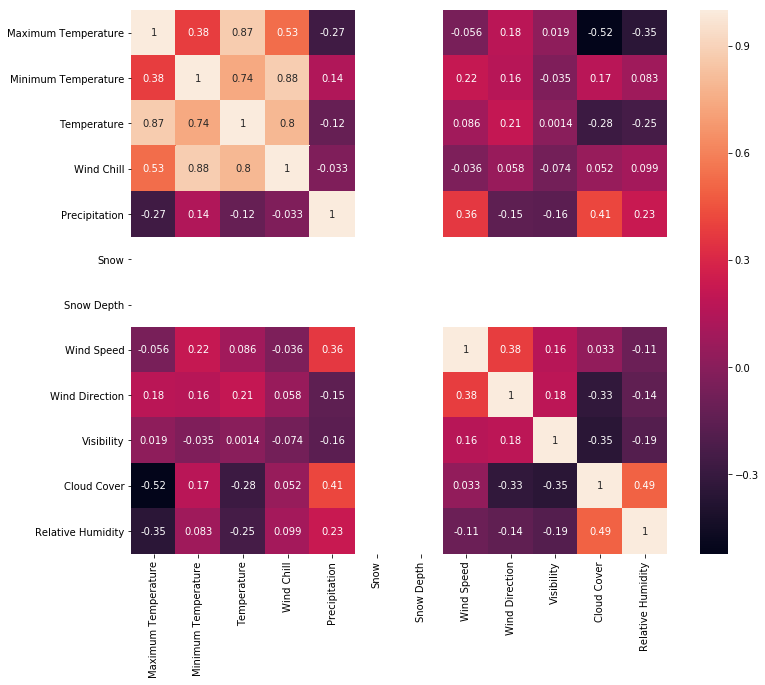

In [10]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(weather_corr, annot=True)

[0 0 0 2 0 0 0 2 0 2 0 0 2 1 0 0 2 2 0 2 2 2 2 2 0 2 2 2 0 2 0 1 2 1 2 1 1
 1 1 1 2 2 2 0 1 1 2 0 0 2 1 1 1 2 2 1 2 1 1 1 0 1 2 1 1 1 2 0 1 2 1 2 2 2
 1 1 2 2 0 0 0 2 2 0 2 2 0 0 2 2 0 0 2 0 2 0 1 2 2 2 2 1 2 0 0 2 2 0 2 2 1
 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 0 1 1 1 1 1 2 2 0 1 2 2 2 2 2 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 0 2 0 2 0 2 0 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 0 1 1
 1 2 0 2 1 1 2 0 0 0 2 0 0 2 2 1 1 0 1 1 0 0 0 2 2 0 0 2 2 0 2 0 0 0 0 0 0
 0 0 0 2 0 1 2 2 2 0 0 0 2 2 2 0 2 2 1 1 1 1 0 1 1 1 1 0 2 1 2 2 2 1 2 1 2
 0 1 2 0 2 2 0 2 2 0 2 2 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 2 2 2 2 2 0 2 0 2 2
 2 2 0 2 2 2 2 2 0 2 1 2 1 2 2 2 2 1 2 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0
 2 2 2 0 2 2 2 2 1 2 2 2 0 0 0 2 2 2 1 2 0 2 2 0 2 2 0 1 2 2 1 1 1 1 1 1 2
 2 0 2 2 1 1 1 0 2 2 1 0 0 2 2 0 0 1 1 1 1 2 2 0 0 0 0 0 0 1 2 0 0 2 0 0 2
 0 0 2 0 0 0 2 0 0 2 2 2 2 2 0 0]


Text(0,0.5,'Wind Speed in miles')

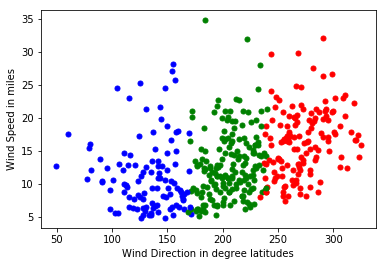

In [11]:

model = KMeans(n_clusters=3)
model.fit(weather_df)
all_predictions = model.predict(weather_df)


centroids = model.cluster_centers_
labels = model.labels_
print(labels)

colors = ["r.", "b.", "g."]

for i in range(len(weather_df)):
    line = plt.plot(weather_df.iloc[i]["Wind Direction"], weather_df.iloc[i]["Wind Speed"], colors[labels[i]], markersize=10)

plt.xlabel("Wind Direction in degree latitudes")
plt.ylabel("Wind Speed in miles")

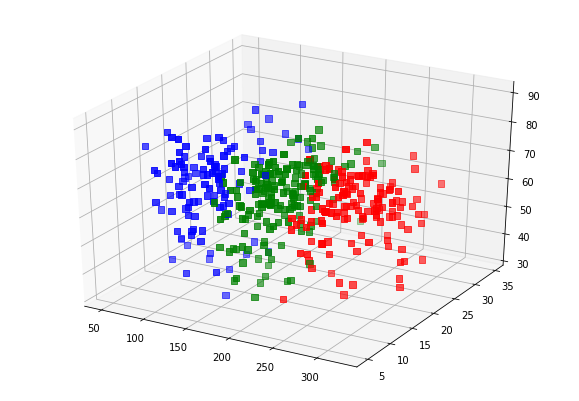

In [12]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'g'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = "3d")

x1 = np.array(weather_df["Wind Direction"])
x2 = np.array(weather_df["Wind Speed"])
x3 = np.array(weather_df["Relative Humidity"])

ax.scatter(x1, x2, x3, marker="s", c=label_color, s=40)
plt.show()

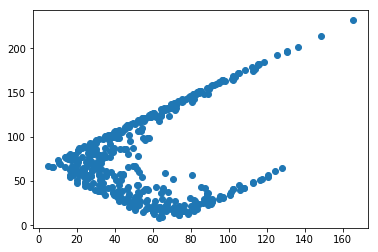

In [13]:
tsne_model = TSNE(learning_rate=1000)
transformed = model.fit_transform(weather_df)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis)
plt.show()

Feature: Maximum Temperature, Score: 0.06731
Feature: Minimum Temperature, Score: 0.04298
Feature: Temperature, Score: 0.03844
Feature: Wind Chill, Score: 0.03126
Feature: Precipitation, Score: 0.01320
Feature: Snow, Score: 0.00000
Feature: Snow Depth, Score: 0.00000
Feature: Wind Speed, Score: 0.11056
Feature: Wind Direction, Score: 0.53841
Feature: Visibility, Score: 0.02910
Feature: Cloud Cover, Score: 0.07026
Feature: Relative Humidity, Score: 0.05849


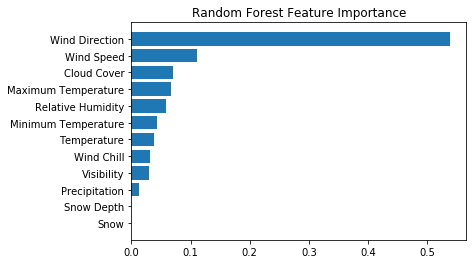

In [14]:
rfdict = {}
rf = RandomForestClassifier()
rf.fit(weather_df, labels)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(weather_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")
for i in range(12):
    print('Feature: %s, Score: %.5f' % (weather_df.columns[i],rf.feature_importances_[i]))
    rfdict[weather_df.columns[i]] = rf.feature_importances_[i]

In [15]:
winddir = weather_df["Wind Direction"]
countN = 0
North = []
countNNE = 0
NorthNorthEast = []
countNE = 0
NorthEast = []
countENE = 0
EastNorthEast = []
countE = 0
East = []
countESE = 0
EastSouthEast = []
countSE = 0
SouthEast = []
countSSE = 0
SouthSouthEast = []
countS = 0
South = []
countSSW = 0
SouthSouthWest = []
countSW = 0
SouthWest = []
countWSW = 0
WestSouthWest = []
countW = 0
West = []
countWNW = 0
WestNorthWest = []
countNW = 0
NorthWest = []
countNNW = 0
NorthNorthWest = []
for i in range(len(winddir.values)):
    if(winddir.values[i] >=350 or winddir.values[i] <=10):
        countN +=1
        North.append(winddir.values[i])
    if(winddir.values[i] >10 and winddir.values[i] <=30):
        countNNE +=1
        NorthNorthEast.append(winddir.values[i])
    if(winddir.values[i] >30 and winddir.values[i] <=50):
        countNE +=1
        NorthEast.append(winddir.values[i])
    if(winddir.values[i] >50 and winddir.values[i] <=70):
        countENE +=1
        EastNorthEast.append(winddir.values[i])
    if(winddir.values[i] >70 and winddir.values[i] <=100):
        countE +=1
        East.append(winddir.values[i])
    if(winddir.values[i] >100 and winddir.values[i] <=120):
        countESE +=1
        EastSouthEast.append(winddir.values[i])
    if(winddir.values[i] >120 and winddir.values[i] <=140):
        countSE +=1
        SouthEast.append(winddir.values[i])
    if(winddir.values[i] >140 and winddir.values[i] <=160):
        countSSE +=1
        SouthSouthEast.append(winddir.values[i])
    if(winddir.values[i] >160 and winddir.values[i] <=190):
        countS +=1
        South.append(winddir.values[i])
    if(winddir.values[i] >190 and winddir.values[i] <=210):
        countSSW +=1
        SouthSouthWest.append(winddir.values[i])
    if(winddir.values[i] >210 and winddir.values[i] <=230):
        countSW +=1
        SouthWest.append(winddir.values[i])
    if(winddir.values[i] >230 and winddir.values[i] <=250):
        countWSW +=1
        WestSouthWest.append(winddir.values[i])
    if(winddir.values[i] >250 and winddir.values[i] <=280):
        countW +=1
        West.append(winddir.values[i])
    if(winddir.values[i] >280 and winddir.values[i] <=300):
        countWNW +=1
        WestNorthWest.append(winddir.values[i])
    if(winddir.values[i] >300 and winddir.values[i] <=320):
        countNW +=1
        NorthWest.append(winddir.values[i])
    if(winddir.values[i] >320 and winddir.values[i] <=340):
        countNNW +=1
        NorthNorthWest.append(winddir.values[i])
print("countN=%d" % (countN))
print("countNNE=%d" % (countNNE))
print("countNE=%d" % (countNE))
print("countENE=%d" % (countENE))
print("countE=%d" % (countE))
print("countESE=%d" % (countESE))
print("countSE=%d" % (countSE))
print("countSSE=%d" % (countSSE))
print("countS=%d" % (countS))
print("countSSW=%d" % (countSSW))
print("countSW=%d" % (countSW))
print("countWSW=%d" % (countWSW))
print("countW=%d" % (countW))
print("countWNW=%d" % (countWNW))
print("countNW=%d" % (countNW))
print("countNNW=%d" % (countNNW))

countN=0
countNNE=0
countNE=1
countENE=1
countE=10
countESE=18
countSE=29
countSSE=36
countS=55
countSSW=61
countSW=55
countWSW=41
countW=71
countWNW=28
countNW=13
countNNW=4


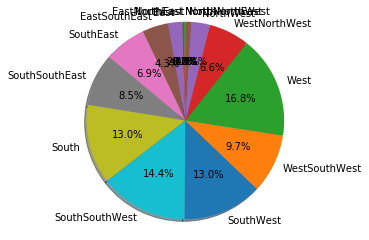

In [16]:
piechart_labels = 'North', 'NorthNorthEast', 'NorthEast', 'EastNorthEast', 'East', 'EastSouthEast', 'SouthEast', 'SouthSouthEast', 'South', 'SouthSouthWest', 'SouthWest', 'WestSouthWest', 'West', 'WestNorthWest', 'NorthWest', 'NorthNorthWest'
piechart_sizes = [countN, countNNE, countNE, countENE, countE, countESE, countSE, countSSE, countS, countSSW, countSW, countWSW, countW, countWNW, countNW, countNNW]
fig1, ax1 = plt.subplots()
ax1.pie(piechart_sizes,labels=piechart_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()


In [17]:
winddir_dict = {countN : North,countNNE : NorthNorthEast, countNE : NorthEast, countENE : EastNorthEast, countE : East, countESE : EastSouthEast, countSE : SouthEast, countSSE : SouthSouthEast, countS : South, countSSW : SouthSouthWest, countSW : SouthWest, countWSW : WestSouthWest, countW : West, countWNW : WestNorthWest, countNW : NorthWest, countNNW : NorthNorthWest }
high = []
moderate = []
low = []
for key, value in winddir_dict.items():
    if((key / len(weather_df)) * 100 >= 10):
        high.append(value)
    if(5 <= (key / len(weather_df)) * 100 < 10):
        moderate.append(value)
    if((0 <= key / len(weather_df)) * 100 < 5):
        low.append(value)
print(low)

[]


In [18]:
model = GradientBoostingClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, weather_df, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.976 (0.037)


In [19]:
collections.Counter(labels)

Counter({0: 139, 2: 176, 1: 108})

In [20]:
max(weather_df["Wind Speed"])

34.8

In [21]:
min(weather_df["Wind Speed"])

4.8

In [22]:
windspeed = weather_df["Wind Speed"]
counthigh = 0
countlow = 0
for j in range(len(windspeed.values)):
    if(windspeed.values[j] > 20):
        counthigh += 1
    else:
        countlow += 1
print("counthigh=%d" % (counthigh))
print("countlow=%d" % (countlow))

counthigh=60
countlow=363


In [23]:
weather_df2 = weather_df.copy()

In [28]:
winddir_df2 = weather_df2["Wind Direction"]
windspeed_df2 = weather_df2["Wind Speed"]
asthma_risk = []
print(len(winddir_df2))
if(rfdict['Wind Speed'] > rfdict['Relative Humidity']):
    for k in range(len(winddir_df2.values)):
        if(min(min(moderate)) <= winddir_df2.values[k] <= max(max(high))):
            if(windspeed_df2.values[k]>=20):
                asthma_risk.append("High")
            if(10 <= windspeed_df2.values[k] < 20):
                asthma_risk.append("Moderate")
            if(4 <= windspeed_df2.values[k] < 10):
                asthma_risk.append("Low")
        if(0 <= winddir_df2.values[k] <min(min(moderate)) or max(max(high)) < winddir_df2.values[k] <= 360):
            if(windspeed_df2.values[k]>=20):
                asthma_risk.append("Moderate")
            if(10 <= windspeed_df2.values[k] < 20):
                asthma_risk.append("Low")
            if(4 <= windspeed_df2.values[k] < 10):
                asthma_risk.append("Low")
    print(len(asthma_risk))
else:
    print("HEllo")

423
423


In [29]:
weather_df2["Asthma Risk"] = asthma_risk

In [30]:
collections.Counter(weather_df2["Asthma Risk"])

Counter({'Moderate': 212, 'High': 43, 'Low': 168})

In [31]:
weather_df2

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Asthma Risk
1,71.5,49.5,59.0,48.5,0.00,0,0,13.2,237.50,9.9,25.4,65.41,Moderate
7,60.7,47.4,54.8,44.8,0.00,0,0,15.3,279.04,9.9,42.1,65.65,Moderate
12,69.8,49.7,59.1,47.3,0.00,0,0,20.8,299.00,9.9,21.7,62.63,Moderate
18,68.2,48.9,57.8,46.5,0.00,0,0,20.8,223.04,9.6,18.9,60.80,High
19,68.1,50.0,57.7,49.0,0.00,0,0,17.1,264.29,9.7,39.4,65.96,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,57.3,44.6,50.1,41.8,0.24,0,0,21.8,195.25,9.6,73.9,69.85,High
1457,63.3,44.4,52.6,41.6,0.00,0,0,16.5,201.25,9.9,17.7,69.32,Moderate
1459,58.7,49.0,53.3,42.3,0.18,0,0,20.0,199.38,9.3,96.8,64.00,High
1460,54.3,46.2,50.1,39.1,0.02,0,0,26.4,290.50,9.8,60.7,59.50,Moderate


In [35]:
label_encoding = preprocessing.LabelEncoder()
weather_df2["Asthma Risk"] = label_encoding.fit_transform(weather_df2["Asthma Risk"].astype(str))
weather_df2["Asthma Risk"][1]

2

In [36]:
X = weather_df2.drop(['Asthma Risk'], axis = 1)
Y = weather_df2['Asthma Risk']
X.columns

Index(['Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity'],
      dtype='object')

In [37]:
model1 = GradientBoostingClassifier(n_estimators=100)
cv1 = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model1, X, Y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

Mean Accuracy: 0.981 (0.031)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
x_train.shape, x_test.shape

((338, 12), (85, 12))

In [40]:
logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [41]:
print("Training score: ", logistic_model.score(x_train,y_train))

Training score:  0.7692307692307693


In [42]:
y_pred = logistic_model.predict(x_test)

In [43]:
print("Testing score: ", accuracy_score(y_test, y_pred))

Testing score:  0.7058823529411765


In [44]:
nb_model = GaussianNB().fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

In [45]:
print("Testing score: ", accuracy_score(y_test, y_pred_nb))

Testing score:  0.7411764705882353


In [46]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [48]:
print("Testing score: ", accuracy_score(y_test, y_pred_dt))

Testing score:  1.0


In [49]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred_svc = svclassifier.predict(x_test)

In [51]:
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

[[ 5  0  2]
 [ 0 29 11]
 [ 1  6 31]]
             precision    recall  f1-score   support

          0       0.83      0.71      0.77         7
          1       0.83      0.72      0.77        40
          2       0.70      0.82      0.76        38

avg / total       0.77      0.76      0.77        85



In [52]:
weather_df['target'] = labels

In [53]:
X1 = weather_df.drop(['target'], axis = 1)
Y1 = weather_df['target']
X1.columns

Index(['Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity'],
      dtype='object')

In [54]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
X1_train.shape, X1_test.shape

((338, 12), (85, 12))

In [55]:
logistic_model_target = LogisticRegression(solver='liblinear').fit(X1_train, Y1_train)
Y1_pred = logistic_model_target.predict(X1_test)

In [56]:
print("Testing score: ", accuracy_score(Y1_test, Y1_pred))

Testing score:  0.9529411764705882


In [57]:
nb_model_target = GaussianNB().fit(X1_train, Y1_train)
Y1_pred_nb = nb_model_target.predict(X1_test)

In [58]:
print("Testing score: ", accuracy_score(Y1_test, Y1_pred_nb))

Testing score:  0.9294117647058824


In [59]:
svclassifier_target = SVC(kernel='linear')
svclassifier_target.fit(X1_train, Y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
Y1_pred_svc = svclassifier_target.predict(X1_test)

In [61]:
print(confusion_matrix(Y1_test,Y1_pred_svc))
print(classification_report(Y1_test,Y1_pred_svc))

[[31  0  0]
 [ 0 20  1]
 [ 0  0 33]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        31
          1       1.00      0.95      0.98        21
          2       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99        85



In [62]:
collections.Counter(labels)

Counter({0: 139, 2: 176, 1: 108})

In [63]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,),
                        max_iter=1000,
                        activation='logistic',
                        alpha=0.001,
                        solver='lbfgs',
                        verbose=True)

In [64]:
mlp_clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [65]:
y_pred_mlp = mlp_clf.predict(x_test)

In [66]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred_mlp})
pred_results.sample(10)

,y_test,y_pred
1438,1,2
340,1,1
1060,0,0
274,2,2
694,1,1
1407,2,2
1338,2,2
634,1,2
1023,1,1
1098,2,2


In [67]:
accuracy_score(y_test, y_pred_mlp)

0.8705882352941177

In [68]:
asthma_risk_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
asthma_risk_crosstab

y_pred,0,1,2
y_test,,,
0,5,0,2
1,0,34,6
2,0,3,35


In [69]:
mlp_clf.fit(X1_train, Y1_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [70]:
y_pred_target_mlp = mlp_clf.predict(X1_test)

In [71]:
pred_results_target = pd.DataFrame({'y_test': Y1_test,
                             'y_pred': y_pred_target_mlp})
pred_results_target.sample(10)

,y_test,y_pred
707,0,0
715,1,1
979,0,0
1097,2,2
1107,0,0
337,2,0
1431,2,2
1424,0,0
273,2,2
1461,0,0


In [72]:
accuracy_score(Y1_test, y_pred_target_mlp)

0.9529411764705882

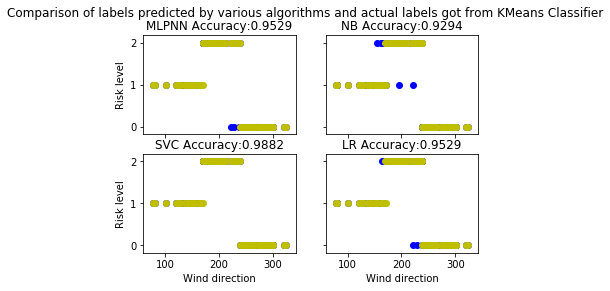

In [73]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("Comparison of labels predicted by various algorithms and actual labels got from KMeans Classifier")
axs[0, 0].scatter(X1_test["Wind Direction"], y_pred_target_mlp, c="b")
axs[0, 0].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[0, 0].set_title('MLPNN Accuracy:%.4f'%accuracy_score(Y1_test, y_pred_target_mlp))
axs[0, 1].scatter(X1_test["Wind Direction"], Y1_pred_nb, c="b")
axs[0, 1].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[0, 1].set_title('NB Accuracy:%.4f'%accuracy_score(Y1_test, Y1_pred_nb))
axs[1, 0].scatter(X1_test["Wind Direction"], Y1_pred_svc, c="b")
axs[1, 0].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[1, 0].set_title('SVC Accuracy:%.4f'%accuracy_score(Y1_test, Y1_pred_svc))
axs[1, 1].scatter(X1_test["Wind Direction"], Y1_pred, c="b")
axs[1, 1].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[1, 1].set_title('LR Accuracy:%.4f'%accuracy_score(Y1_test, Y1_pred))

for ax in axs.flat:
    ax.set(xlabel='Wind direction', ylabel='Risk level')


for ax in axs.flat:
    ax.label_outer()

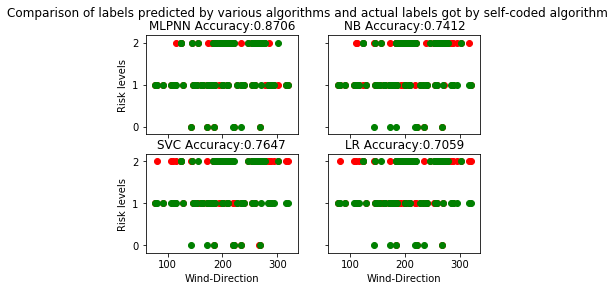

In [74]:
fig1, axs1 = plt.subplots(2, 2)
fig1.suptitle("Comparison of labels predicted by various algorithms and actual labels got by self-coded algorithm")
axs1[0, 0].scatter(x_test['Wind Direction'], y_pred_mlp, c="r")
axs1[0, 0].scatter(x_test['Wind Direction'], y_test,c="g")
axs1[0, 0].set_title('MLPNN Accuracy:%.4f'%accuracy_score(y_test, y_pred_mlp))
axs1[0, 1].scatter(x_test['Wind Direction'], y_pred_nb, c="r")
axs1[0, 1].scatter(x_test['Wind Direction'], y_test,c="g")
axs1[0, 1].set_title('NB Accuracy:%.4f'%accuracy_score(y_test, y_pred_nb))
axs1[1, 0].scatter(x_test['Wind Direction'], y_pred_svc, c="r")
axs1[1, 0].scatter(x_test['Wind Direction'], y_test,c="g")
axs1[1, 0].set_title('SVC Accuracy:%.4f'%accuracy_score(y_test, y_pred_svc))
axs1[1, 1].scatter(x_test['Wind Direction'], y_pred, c="r")
axs1[1, 1].scatter(x_test["Wind Direction"],y_test,c="g")
axs1[1, 1].set_title('LR Accuracy:%.4f'%accuracy_score(y_test, y_pred))

for ax1 in axs1.flat:
    ax1.set(xlabel='Wind-Direction', ylabel='Risk levels')

for ax1 in axs1.flat:
    ax1.label_outer()